# ggplot2 at Joint Genome Institute

This notebook contains the materials for the ggplot2 lecture hosted at Joint Genome Institute on March 7 2018. These materials were prepared by Rebecca Barter.

## Useful resources for learning ggplot2

- **ggplot2** book (https://www.amazon.com/dp/0387981403/ref=cm_sw_su_dp?tag=ggplot2-20) by Hadley Wickham
- **R for Data Science** book (http://r4ds.had.co.nz/data-visualisation.html) by Garrett Grolemund and Hadley Wickham
- **The layered grammar of graphics** (http://vita.had.co.nz/papers/layered-grammar.pdf) by Hadley Wickham

## Materials outline

The general outline of the class is as follows:

1. Layered grammar of graphics

1. Basic ggplot2 plot types

1. Grouping in ggplot2

1. Scales, axes, legends and positioning

1. Faceting

1. Themes: deviating from the defaults to produce beautiful graphics


By the end of this tutorial, you will be able to produce beautiful graphics such as this:
<img src="beautiful_plot.png" width="800">

# The layered grammar of graphics

Hadley Wickham built ggplot2 based on a set of principles outlines in his *layered grammar of graphics* (inspired by Wilkinson's orginal *grammar of graphics*). 

The basic idea is that a statistical graphic is a mapping from **data** to **aesthetic** attributes (such as colour, shape, and size) of **geometric** objects (such as points, lines, and bars).

We will discover that each piece of terminology mentioned above corresponds to a type of object in ggplot2.

- **data**: a data frame containing the variables that you want to visualize

- **geoms**: geometric objects (circles, lines, text) that you will actually see

- **aesthetics**: the mapping from the data to the geometric objects (e.g. by describing position, size, colour, etc)



# Setup: load the library and gapminder data

In this section, we are going to make our first plot. 

This plot will be based on the `gapminder` dataset that can be loaded from the following link: https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv. 

First we set some options for our notebook, then we load in the ggplot2 library

In [1]:
# set up the notebook parameters
options(repr.plot.width=6, repr.plot.height=4)
# load in the ggplot2 library
# install.packages("ggplot2)
library(ggplot2)

Below, we show the first 10 rows of the `gapminder` dataset.

In [2]:
# if the data is already saved in the current local folder:
gapminder <- read.csv("data/gapminder-FiveYearData.csv")
# to download the data directly into R:
# gapminder <- read.csv("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv")

# print the dimension of the dataset
dim(gapminder)
# look at the first 10 rows
head(gapminder, 15)

[1] 1704    6

country,year,pop,continent,lifeExp,gdpPercap
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134
Afghanistan,1982,12881816,Asia,39.854,978.0114
Afghanistan,1987,13867957,Asia,40.822,852.3959
Afghanistan,1992,16317921,Asia,41.674,649.3414
Afghanistan,1997,22227415,Asia,41.763,635.3414


# The `ggplot()` function: linking the plot to the data

The first argument we will use is the **`ggplot` function**. 

This function will tell ggplot which data (a data frame) we are interested in, and how each of the variables in our dataset will be used (e.g. as an x or y coordinate, as a coloring variable or a size variable, etc).

Below, we define our first ggplot object with the gapminder dataset. 

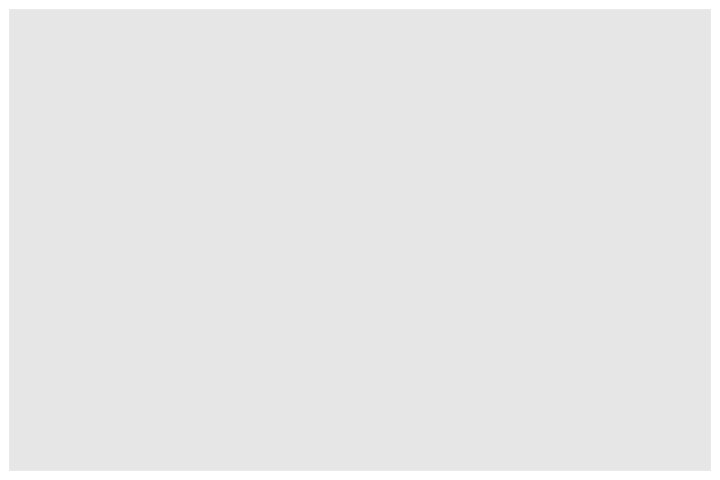

In [3]:
ggplot(gapminder)

We have not specified which variables are to be used for which aesthetic properties (i.e. x- and y-coordinates, color, size, etc) nor which geometric objects we want to use (points, bars, etc)

To tell ggplot which variables in `gapminder` should be used for which aesthetic properties, **we need to specify an aesthetic function.**

Below we tell ggplot to use the `gdpPercap` variable as the x-position and the `lifeExp` variable as the y-position. The output of this function is a grid with `gdpPercap` as the x-axis and `lifeExp` as the y-axis. 

However, **we have not yet told ggplot what type of geometric object the data will be mapped to**, so again, no data has been displayed.

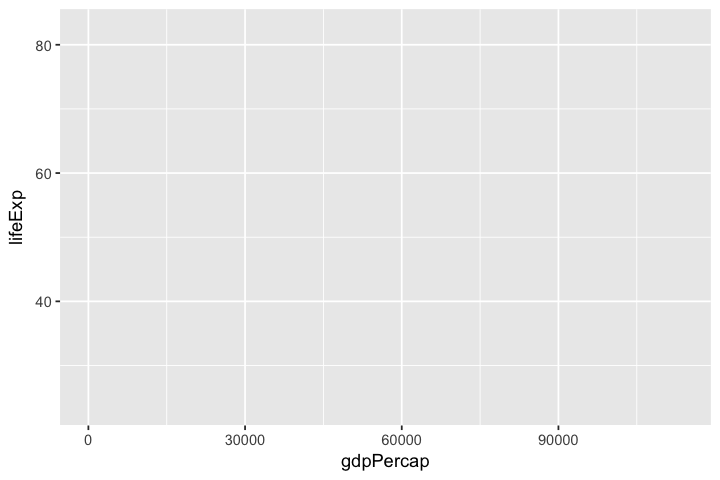

In [4]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp))

## Geometric objects: our next layer

Next, we will add a "geom" layer to our ggplot object. Any geometric layer we add to our plot above will inherit the aesthetic mappings specified in our `ggplot()` function. 

For example, below we add a points layer which will place a point for each (x = `gdpPercap`, y = `lifeExp`) found in the data

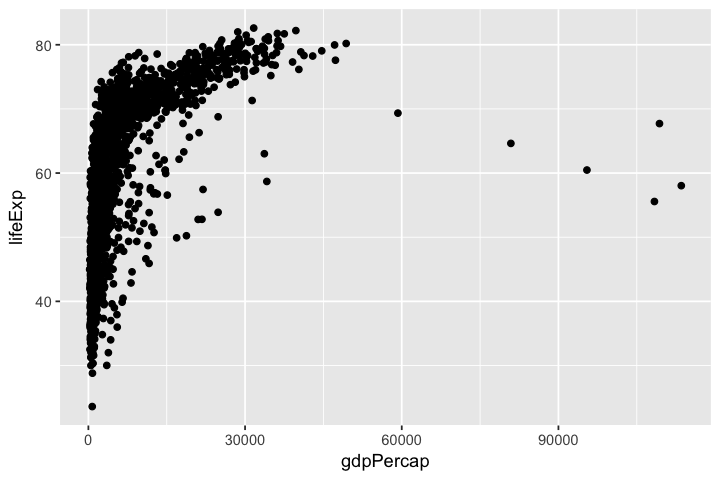

In [5]:
# describe the base ggplot object and tell it what data we are interested in along with the aesthetic mapping
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  # add a points layer on top
  geom_point()

What we have done is map each country-year (row) in the data to a point in the space defined by the `gdpPercap` and `lifeExp` value. The end result is an ugly blob of points. Fortunately, there are many things that we can do to make this blob of points pretter and more informative.

## Specifying aesthetic properties

For example, we can change the global aesthetic properties (i.e. aesthetic properties not linked to the data itself) by specifying arguments in the `geom_point()` function. We can increase transparency of all points by setting the `alpha` argument to a low value (`alpha = 0` corresponds to totally transparent and `alpha = 1` corresponds to no transparency), changing the color of the points to be grey instead of black, and making the points smaller using the `size` argument.

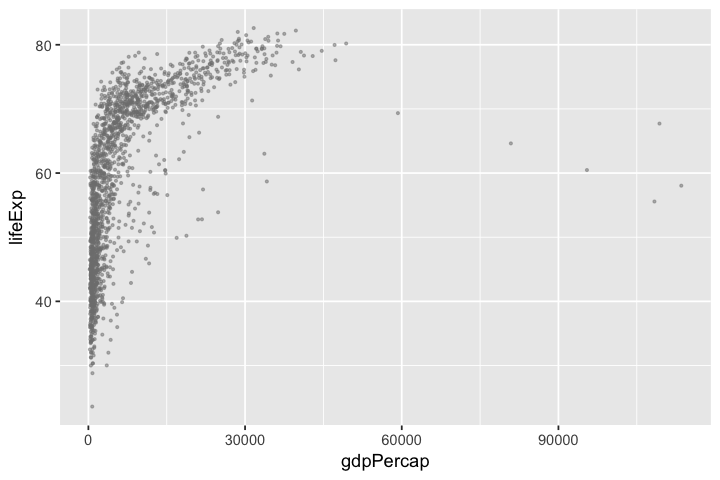

In [6]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5, col = "grey50", size = 0.5)

## Mapping data to aesthetics

Note that the above argument changed the alpha value and color for *all of the points at once*. 

One of the truly powerful features of ggplot2 is the ability to change these aesthetics based on the data itself. Perhaps we want to color each point by `continent` so that all countries from the same continent have the same color. Instead of separating the data into five different subsets (based on the possible values of continent), and adding the different colored points separately, we can simply add all the points once and add an colour aesthetic mapping for `continent`.

**Note that whenever we are using a variable from the data to describe an aesthetic property of a geom, this aesthetic property needs to be included in the `aes()` function. If we want to provide a global aesthetic property (that doesn't depend on the data, it can be included as a global argument of the `geom_` function.**

In [7]:
# list all the unique continents
unique(gapminder$continent)

[1] Asia     Europe   Africa   Americas Oceania 
Levels: Africa Americas Asia Europe Oceania

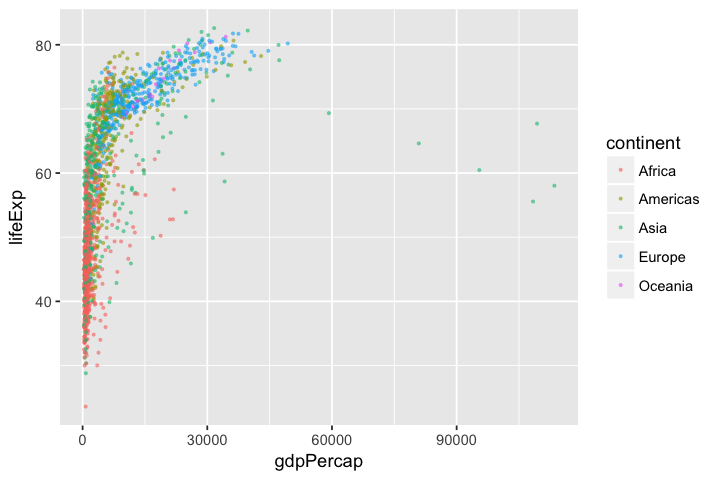

In [8]:
# add a color aesthetic
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point(alpha = 0.5, size = 0.5)

## Other types of aesthetics

We could also add aesthetic mappings for other features such as shape, size, transparancy (alpha), and more! For example, changing the size based on population we use the argument `size = pop` below.

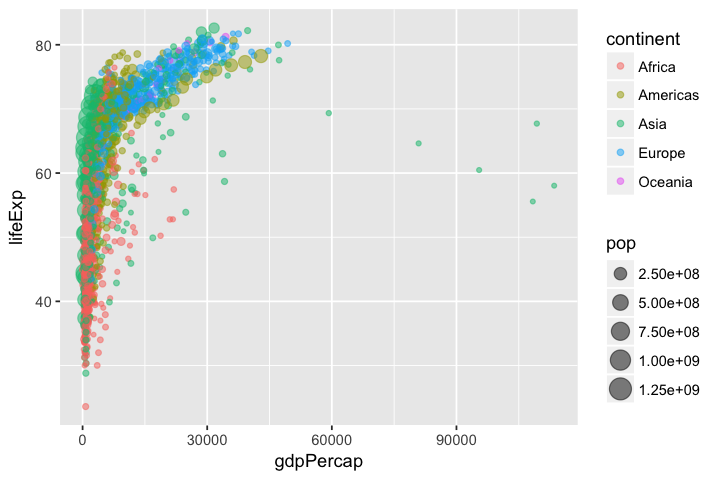

In [9]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5)

## A word of caution: ordering matters!

One word of warning is that aesthetic properties specified later will have priority over those specified earlier. For example, if in our `aes()` function we defined color based on the `continent` variable, but in our `geom_` function we defined the global color to be `grey50`, the global color would take precedence since it was defined later.

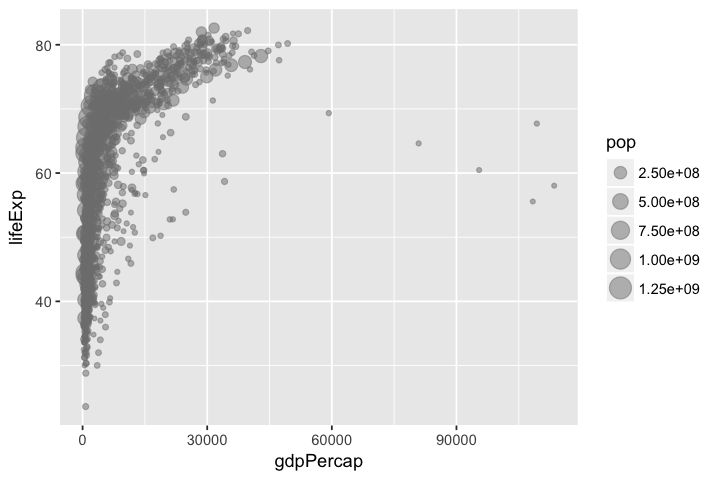

In [10]:
# an example where ordering matters:
# color = "grey50" is defined in geom_point() after specifying the aesthetic mappeing color = "continent"
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5, color = "grey50")

# Other types of geom layers

So far, we have only seen scatterplots (point geoms), however, there are many other geoms we could add, including:

- lines

- histograms

- boxplots and violin plots

- barplots

- smoothed curves

While scatterplots are definitely the easiest to add, since each point in the data is mapped to a particular point in space, these other types of geoms need to group data together in some way. 



## Line plots

For example, suppose that we wanted to create a line plot showing how life expectency changes over time by country. Theoretically we could just change `geom_point` to `geom_line` and change our `x` aesthetic to `year` and we would be good to go. Below we do just this.

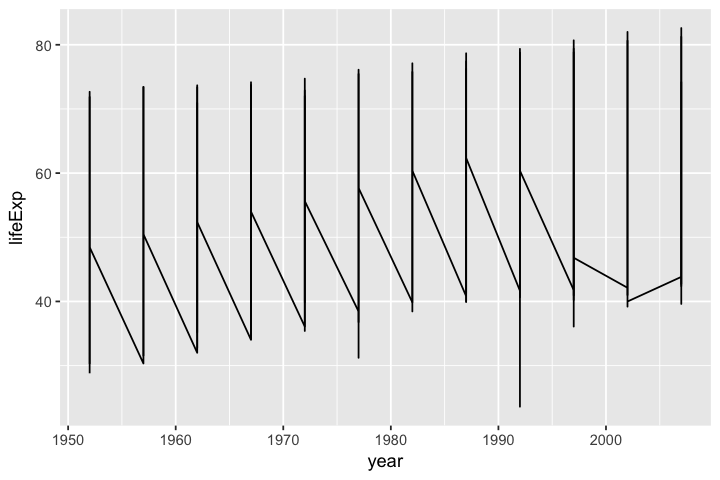

In [11]:
ggplot(gapminder, aes(x = year, y = lifeExp)) +
  geom_line()

### Grouping in line plots

Clearly something has gone wrong: our plot should have many different lines, one for each country, but instead, we have this strange zig-zag pattern. What's happening is that we haven't told ggplot which rows in the data should be *grouped* together, i.e. we haven't specified that we wanted one line for *each country*!

To fix this problem, we need to specify which variable should be used as the grouping aesthetic (so that there will be one line drawn for the data specified by each level of the grouping variable).

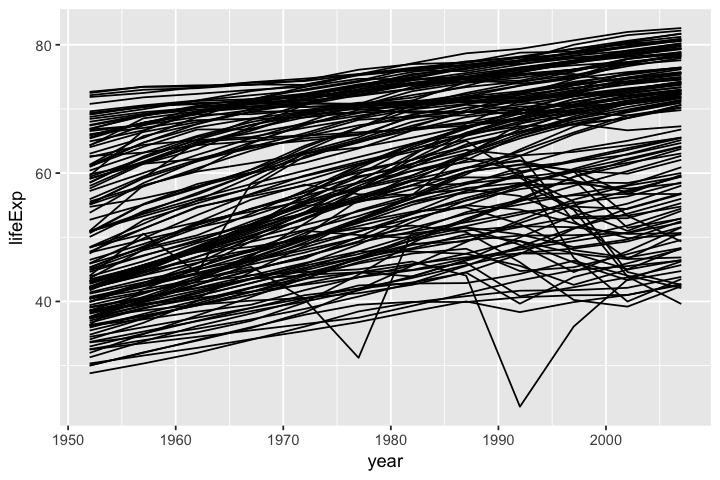

In [12]:
ggplot(gapminder, aes(x = year, y = lifeExp, group = country)) +
  geom_line()

## Mapping data to grouping aesthetics

Next, we can add aesthetics just as we did in the scatterplot examples above. To use color to help us identify which continent each country belongs to, we use the `color` aesthetic.

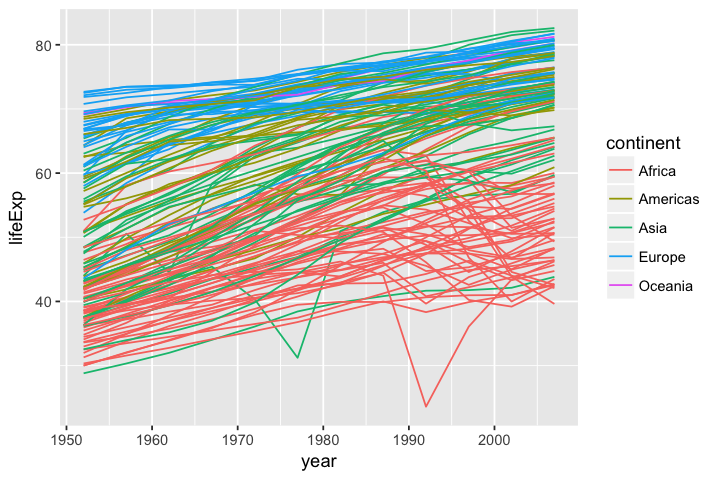

In [13]:
ggplot(gapminder, aes(x = year, y = lifeExp, group = country, color = continent)) +
  geom_line()

## More on color mapping

Note that it would be a bad idea to color each line by `country` itself since there would be far too many colors. Humans can only process a max of 7 or so colors at once, so it is in general a good idea not to overdo the use of colors in your plots!

If the grouping variable corresponds to a color (or alpha, size, etc) variable, then you can simply specify the color (or alpha, size, etc) variable, leaving the grouping variable unspecified. 

For example, below we group by continent in two different ways (can you explain why the plots look like zig-zags?)

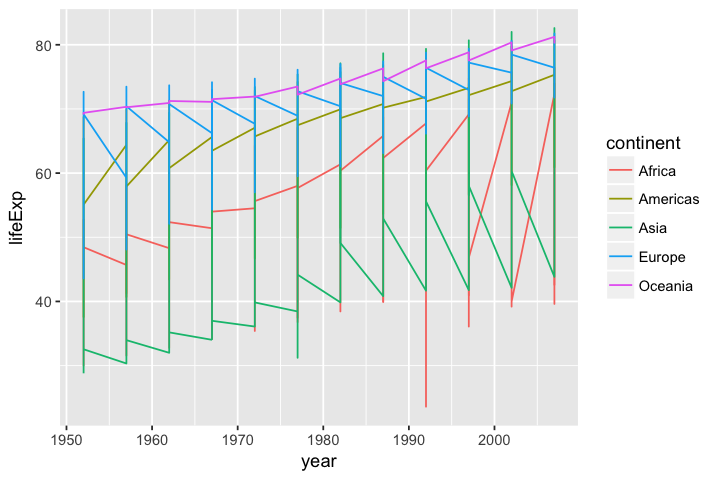

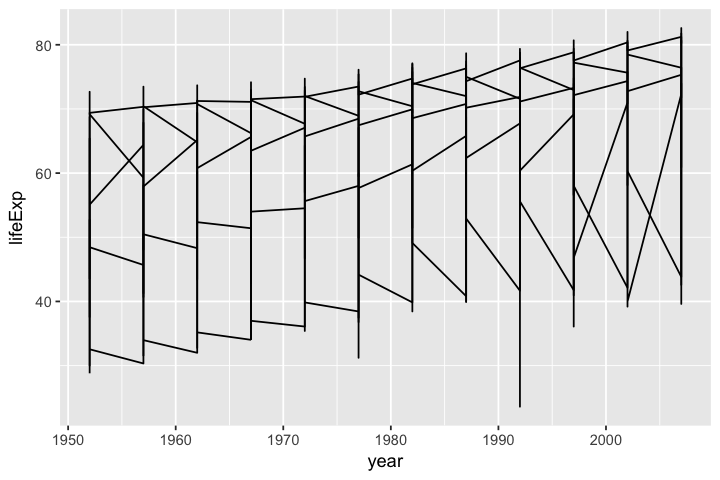

In [14]:
# grouping by specifying color
ggplot(gapminder, aes(x = year, y = lifeExp, color = continent)) +
  geom_line()
# grouping by specifying group
ggplot(gapminder, aes(x = year, y = lifeExp, group = continent)) +
  geom_line()

## Boxplots

Unlike for line plots and scatterplots, basic boxplots present only one continuous variable based on the y-aesthetic. However, even if we are only presenting one variable, we still need to provide both an `x` and `y` aesthetic, so we could set the `x` aesthetic to an arbitrary value (e.g. `x = 1`).

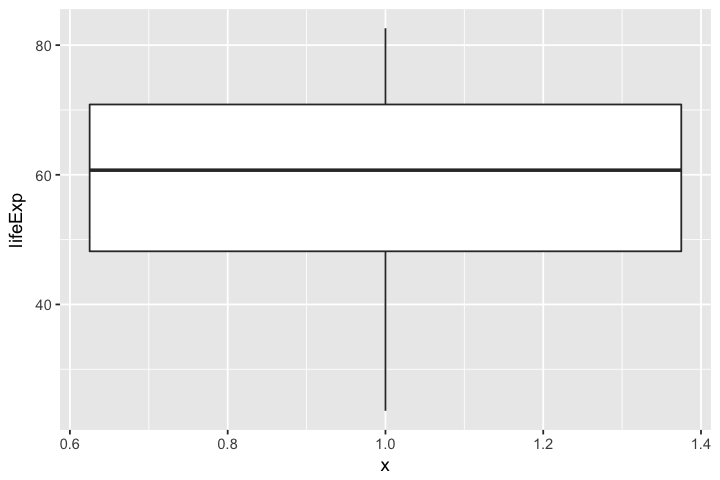

In [15]:
ggplot(gapminder, aes(x = 1, y = lifeExp)) +
  geom_boxplot()

## Comparing boxplots by grouping

Boxplots are often used to compare distirbutions of a continuous variable across different groups of the data. 

Below we compare life expectency across different continents. 

We again need to specify the grouping variable (`continent`).

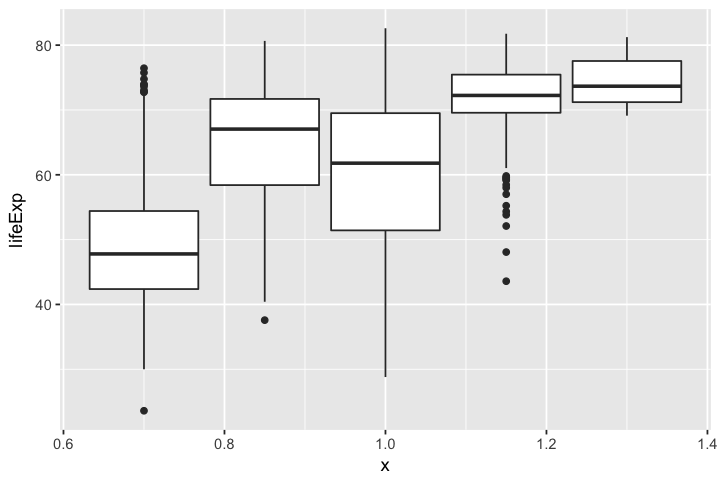

In [16]:
ggplot(gapminder, aes(x = 1, y = lifeExp, group = continent)) +
  geom_boxplot()

## Comparing boxplots by x-position

Ideally the x-axis would tell us which boxplot corresponded to which continent! 

We can specify the groupings of the boxplot using the `x` argument (with a categorical variable) in the `aes()` function.

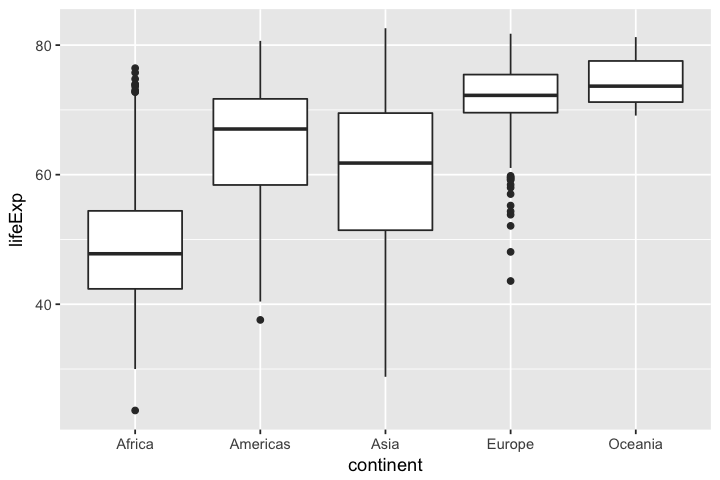

In [17]:
ggplot(gapminder, aes(x = continent, y = lifeExp)) +
  geom_boxplot()

## Grouping boxplots by color

If we wanted to liven our plot up a little bit, we could also specify the color of the boxplots based on the continent. 

- Note that for boxplots, the `color` aesthetic refers to the outline of the boxes, and the `fill` aesthetic refers to the color inside the boxes. 

- Note also that we cannot remove the `x = continent` variable in this case as we did before when grouping by color because boxplots require that an `x` aesthetic is provided.

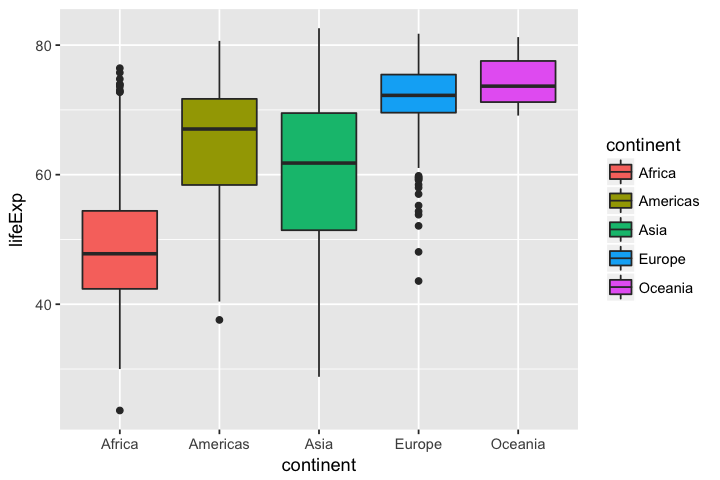

In [18]:
ggplot(gapminder, aes(x = continent, y = lifeExp, fill = continent)) +
  geom_boxplot()

## Histograms

Histograms, similarly to boxplots, are designed to display the distribution of only one variable (corresponding to the `x` aesthetic). Unlike for boxplots, however, we do not need to also provide a `y` aesthetic for histograms.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


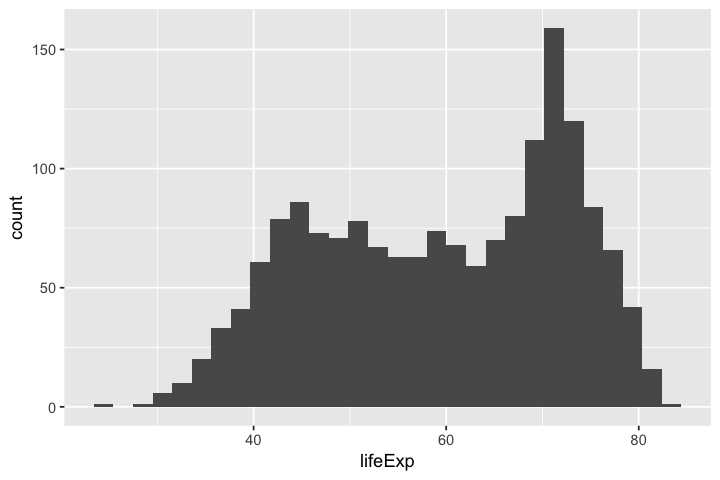

In [19]:
ggplot(gapminder, aes(x = lifeExp)) + 
  geom_histogram()

## Density histograms

By default the y-axis is the "count" (i.e. number of rows for which the `lifeExp` value fell into the corresponding bin.) 

To change the y-axis to the density, we need to specify `y = ..density..`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


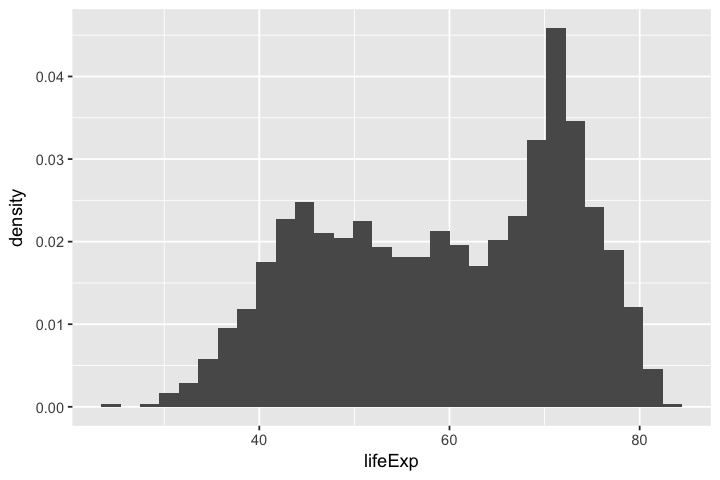

In [20]:
ggplot(gapminder, aes(x = lifeExp, y = ..density..)) + 
  geom_histogram()

## Setting binwidth 

Note the warning that we get every time: "`stat_bin()` using `bins = 30`. Pick better value with `binwidth`." 

It is always a good idea to actually choose the binwidth yourself by setting a global binwidth parameter in the `geom_histogram` function.

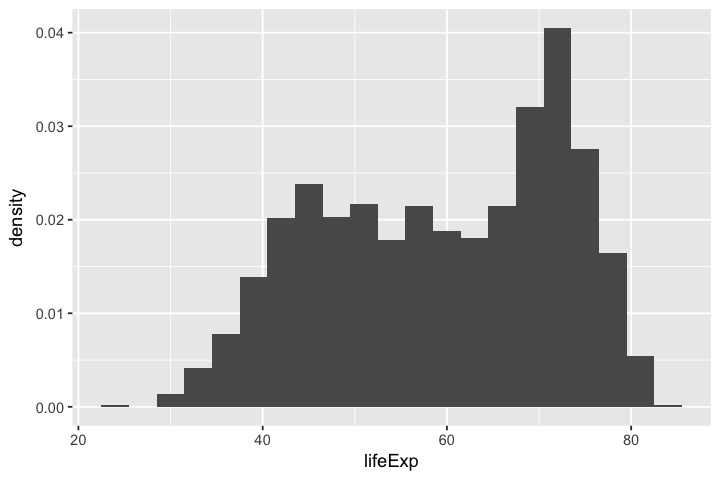

In [21]:
ggplot(gapminder, aes(x = lifeExp, y = ..density..)) + 
  geom_histogram(binwidth = 3)

## Making histograms prettier

I also like to put a white outline on each bar for aesthetic purposes. 

This can be done using the global histogram `color` parameter (as opposed to the `aes()` color parameter since we are not using the data to set the color).

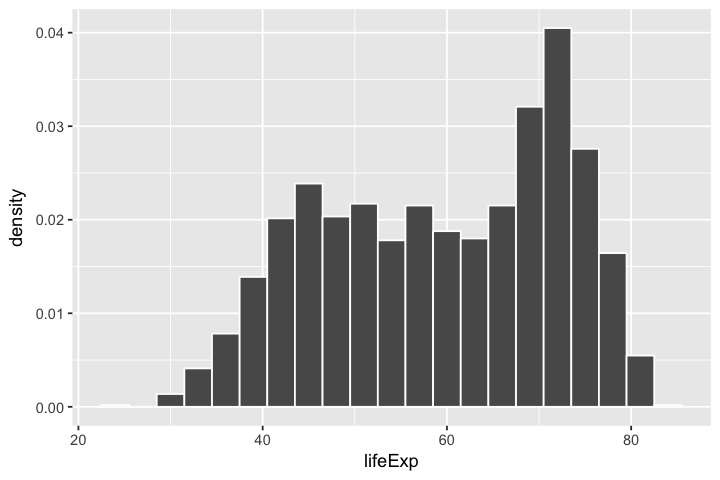

In [22]:
ggplot(gapminder, aes(x = lifeExp, y = ..density..)) + 
  geom_histogram(binwidth = 3, color = "white")

## Bar plots

Bar plots are similar to histograms where the bins levels of a categorical variable (rather than bins of a continuous variable).

The mapping mechanism for bar plots is slightly different to what we have seen up until now. 

By default, `geom_bar()` will count the number of rows that lie in each level of the specified categorical variable.

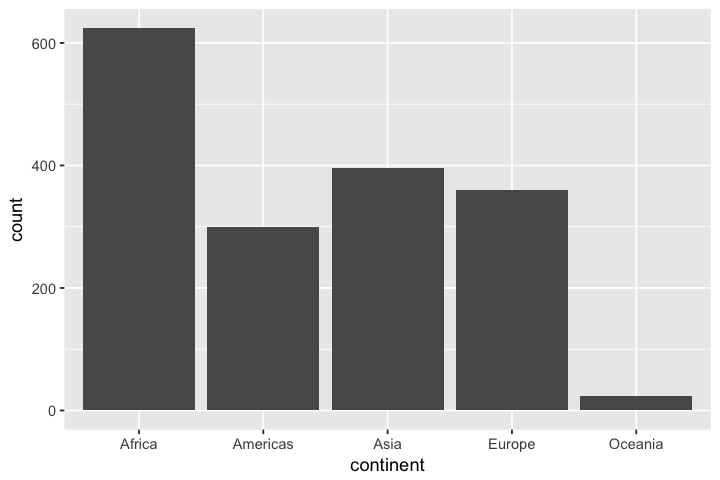

In [23]:
ggplot(gapminder, aes(x = continent)) + 
  geom_bar()

Recall that there are multiple year entries for each country in the data: this approach is counting each country 12 times!

## Manually specifying the height of the bars


We need to define a new data frame that counts how many *unique* countries are in each continent.

The best way to do this is to use the functions from the dplyr package in R.

In [24]:
library(dplyr)
# identify how many countries are in each contininet
# (using a little dplyr!)
continent_summary <- gapminder %>% 
    group_by(continent) %>%
    summarise(n_countries = length(unique(country)))
continent_summary


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



continent,n_countries
Africa,52
Americas,25
Asia,33
Europe,30
Oceania,2


We can then use this new data frame in our ggplot function.

When providing a `y` variable with `geom_bar`, we need to specify `stat = "identity`.

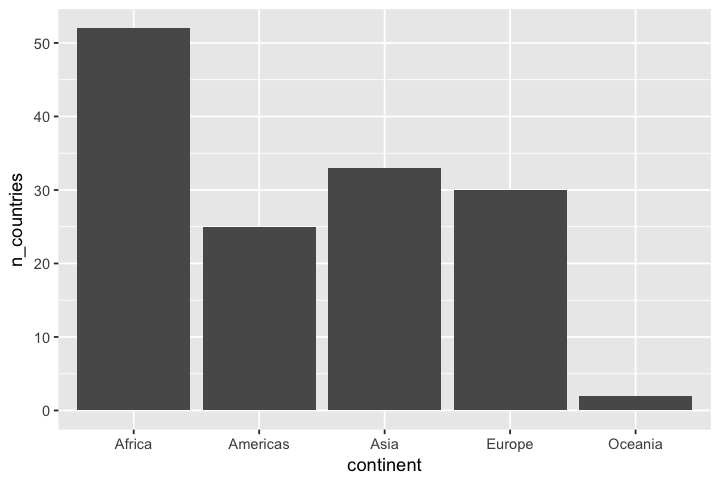

In [25]:
ggplot(continent_summary, aes(x = continent, y = n_countries)) +
    geom_bar(stat = "identity")

## Smoothed curves and adding multiple layers

Let's head back to the scatterplot example from earlier. Sometimes we want to be able to add a smoothed curve to our scatterplots. Fortunately this is very easy to do with a `geom_smooth()` layer.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


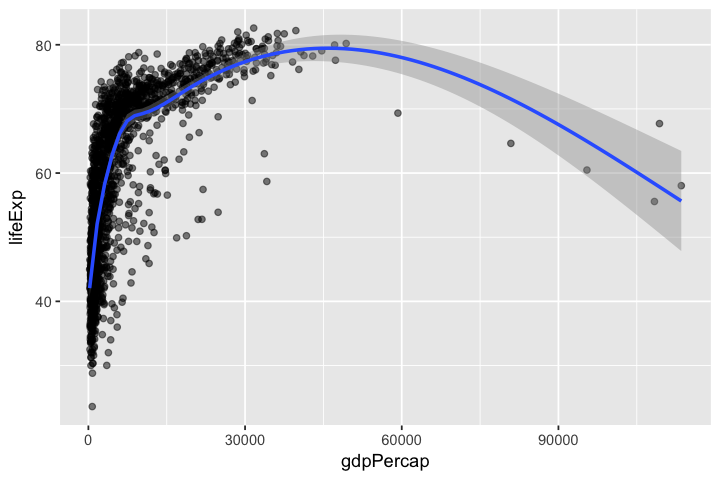

In [26]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5) +
  geom_smooth()

## Setting aesthetic mappings with multiple geom layers

This is the first time we have seen multiple geom layers used at once (a scatterplot and a smoothed curve). 

When using multiple layers at the same time, **`aes()` options specified in the `ggplot()` function will apply to *all layers***. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


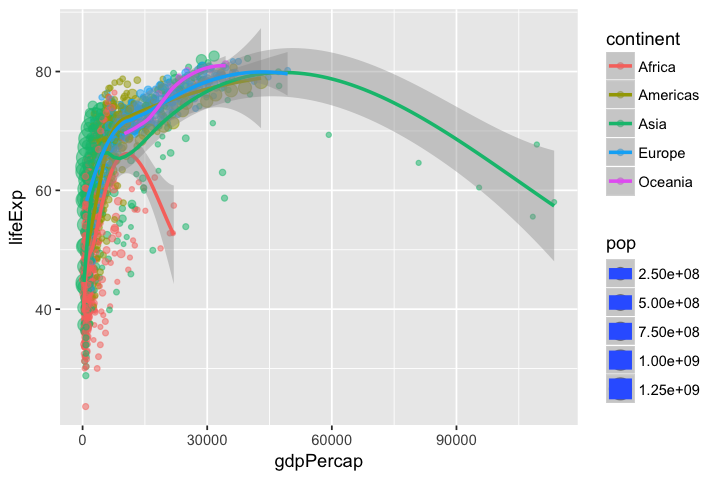

In [27]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, col = continent, size = pop)) +
  geom_point(alpha = 0.5) +
  geom_smooth()

## Specifying aesthetics inside the `geom_` functions

The way to get around this is to specify geom-specifc aesthetic mappings inside each geom layer.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


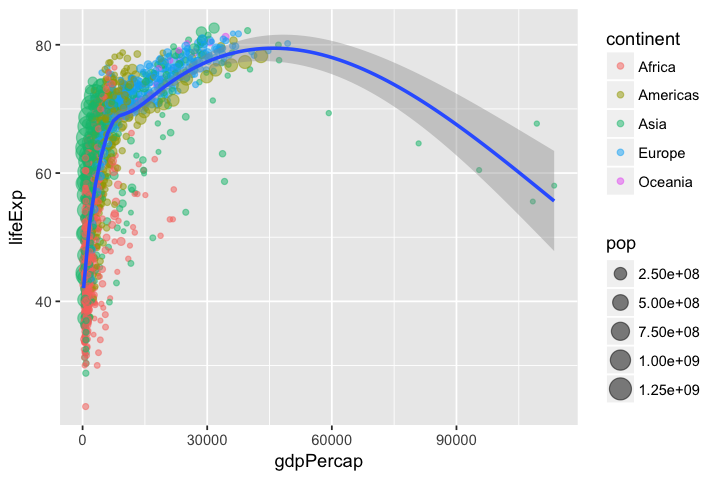

In [28]:
ggplot(gapminder) +
  geom_point(aes(x = gdpPercap, y = lifeExp, col = continent, size = pop), alpha = 0.5) +
  geom_smooth(aes(x = gdpPercap, y = lifeExp))

## Combining global and layer-specific aesthetic mappings

We could keep the global aesthetic mappings inside the `ggplot()` function but allow for individual aesthetic mappings within each layer.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


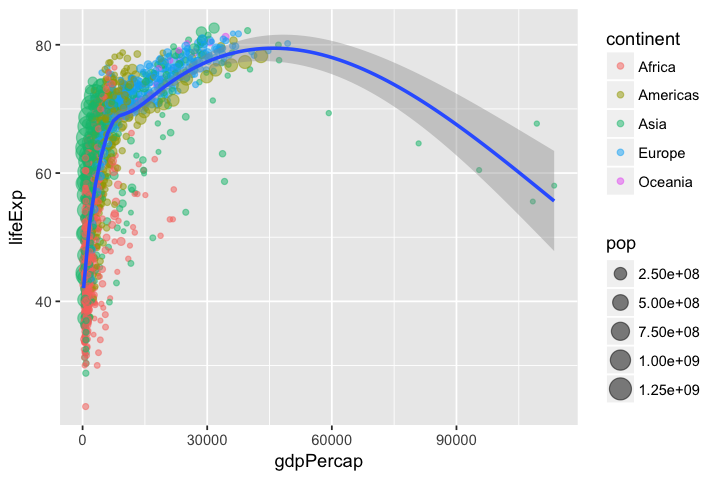

In [29]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point(aes(col = continent, size = pop), alpha = 0.5) +
  geom_smooth()

## Multiple layers: order matters

**The order in which you add geoms to your plot dictates the order in which they appear.** 

In the example above, we added the smoothing curve after the points, which meant that the smoothing curve lay ontop of the points. 

Below, we add the smoothing curve before the points and find that the points now lie above the curve.

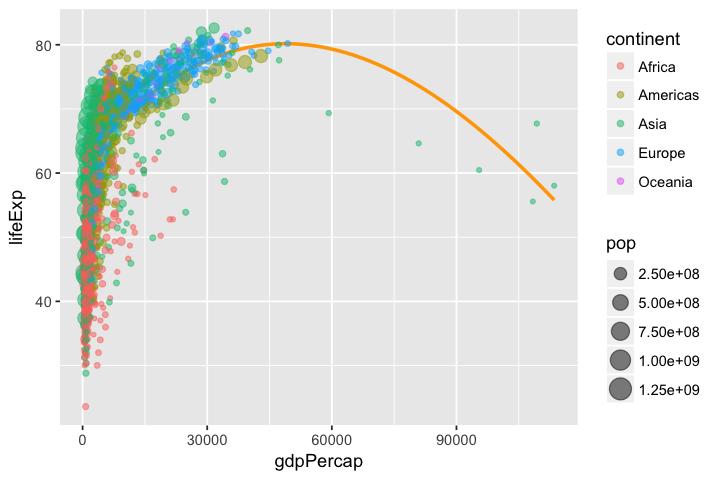

In [30]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_smooth(col = "orange", se = FALSE, method = "loess") +
  geom_point(aes(col = continent, size = pop), alpha = 0.5)

# Scales

**Scales control the way in which the the aesthetic mappings map from data to aesthetic value.** 

For example, by default, the `x`-position mapping maps data values uniformly to x-position in space, but we could instead use a logarithmic mapping or a square root mapping.

Scales extend to other types of aesthetic functions too. A scale for color specifies which data values are mapped to which colors, and a scale for size dictates how large a data value of 1 is relative to a data value of 10 (for example).

To keep things simple, let's filter to a single year.

In [31]:
gapminder_2007 <- gapminder %>% filter(year == 2007)

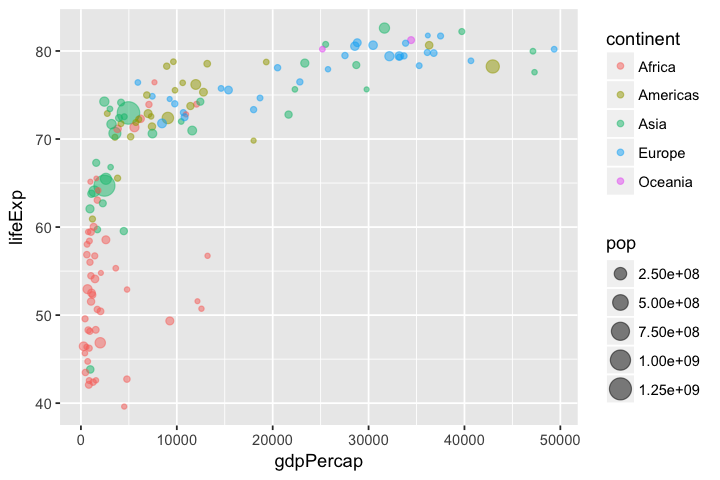

In [32]:
ggplot(gapminder_2007) +
  geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5)

## Log scales

Arguably, it would be better to show `gdpPercap` on a logarithmic scale, rather than in its raw form. 

Below we change the x-scale by adding a `scale_x_log10()` layer.

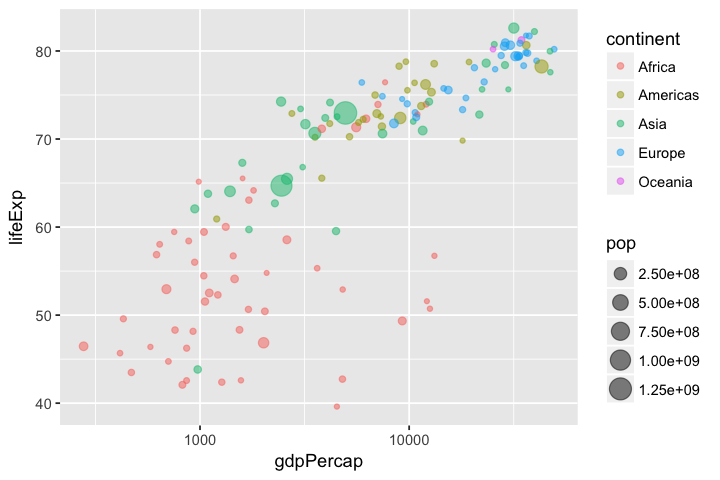

In [33]:
ggplot(gapminder_2007) +
  geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
  scale_x_log10()

## Scale options

Each of these scale functions has many options including changing the limits, the breaks, etc. For example in the plot below, we manipulate the x-axis by providing arguments to our `scale` function of choice.

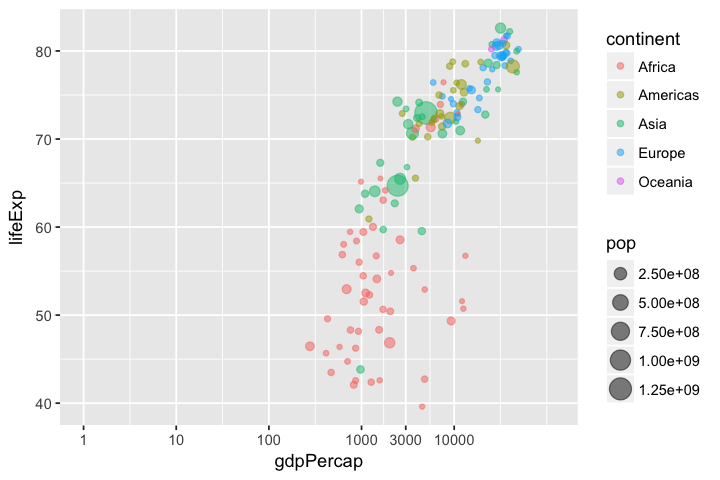

In [34]:
ggplot(gapminder_2007) +
  geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
  # clean the x-axis breaks
  scale_x_log10(breaks = c(1, 10, 100, 1000, 3000, 10000),
                limits = c(1, 120000))

## Scales for color and size

Scales can also be used for other types of aesthetic mappings including color and size. 

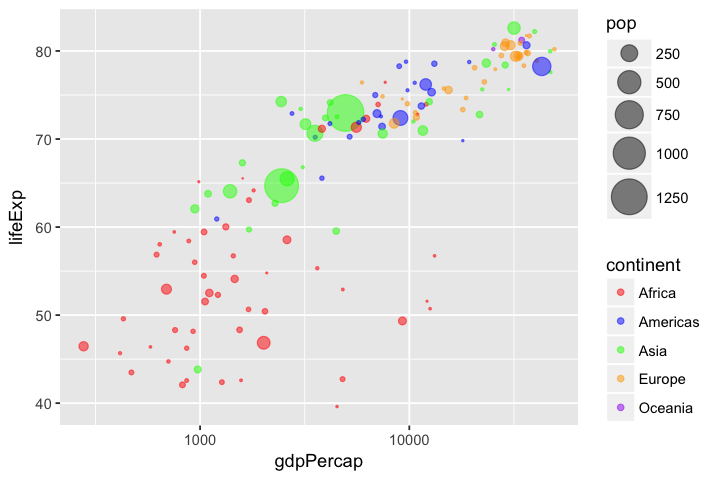

In [35]:
ggplot(gapminder_2007) +
    geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
    # clean the x-axis breaks
    scale_x_log10() +
    scale_color_manual(values = c("Africa" = "red", "Americas" = "blue", "Asia" = "green", 
                                  "Europe" = "orange", "Oceania" = "purple")) +
    scale_size_continuous(range = c(0.1, 10),
                          breaks = 1000000 * c(250, 500, 750, 1000, 1250),
                          labels = c("250", "500", "750", "1000", "1250"))

## Changing aesthetic names

We can use the scale functions to change the name of the aesthetic mappings for example changing the name of the x-axis, the color legend.

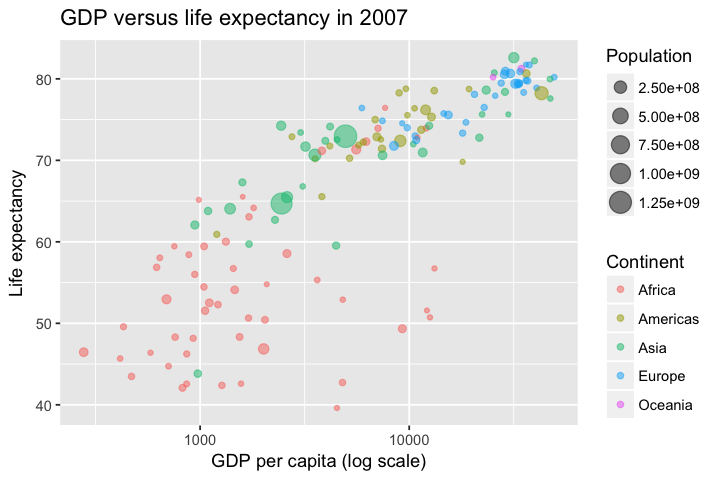

In [36]:
ggplot(gapminder_2007) +
    # add scatter points
    geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
    # log-scale the x-axis
    scale_x_log10(name = "GDP per capita (log scale)") +
    scale_y_continuous(name = "Life expectancy") + 
    scale_color_discrete(name = "Continent") +
    scale_size_continuous(name = "Population") +
    ggtitle("GDP versus life expectancy in 2007") 

## Removing legends

Sometimes we prefer to remove the legends (e.g. for population). We can do this inside the `scale_` function by specifying `guide = "none"`.

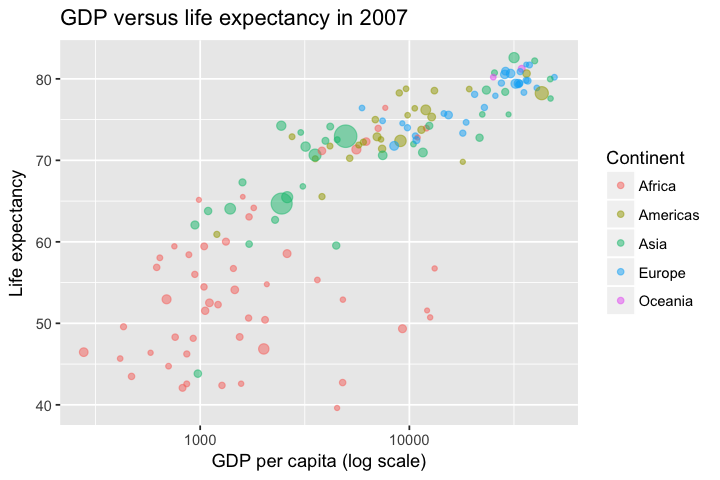

In [37]:
ggplot(gapminder_2007) +
    # add scatter points
    geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
    # log-scale the x-axis
    scale_x_log10(name = "GDP per capita (log scale)") +
    scale_y_continuous(name = "Life expectancy") + 
    scale_color_discrete(name = "Continent") +
    scale_size_continuous(name = "Population", guide = "none") +
    ggtitle("GDP versus life expectancy in 2007") 

# Faceting

Sometimes we want to be able to make multiple plots of the same thing across different categories. 

This can be achieved with minimal repetition using faceting.

In the example below, we will remake the plot above individually for each continent.

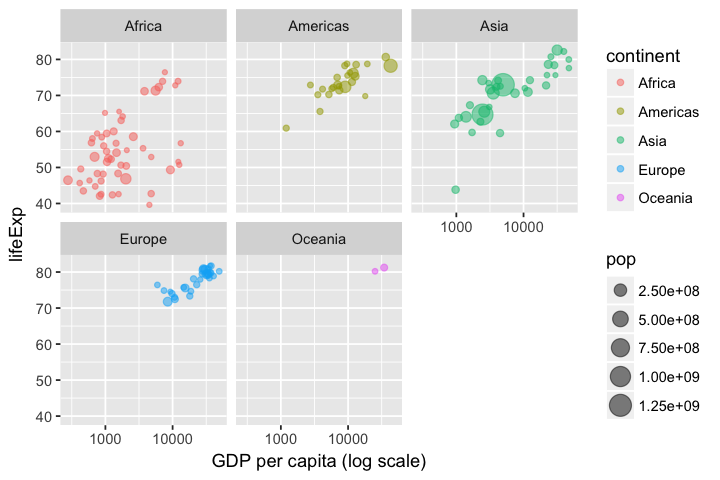

In [38]:
ggplot(gapminder_2007) +
    # add scatter points
    geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
    # log-scale the x-axis
    scale_x_log10(name = "GDP per capita (log scale)") +
    # create a different plot for each continent
    facet_wrap(~continent)

# Themes: making even more beautiful figures with ggplot2

One of the first things I usually do when I make a ggplot is edit the default theme. 

I really don't like the grey background, nor do I like having a grid unless it really helps with the plot interpretation.

One of the simplest themes is `theme_classic`, however there are several other themes to choose from. The `ggthemes` package offers many additional themes, but you could also make your own using the `theme()` function.

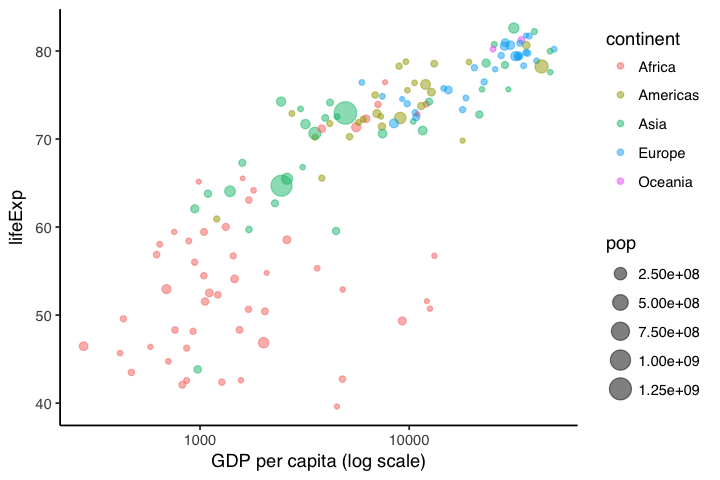

In [39]:
ggplot(gapminder_2007) +
    # add scatter points
    geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
    # log-scale the x-axis
    scale_x_log10(name = "GDP per capita (log scale)") +
    # add a nicer theme
    theme_classic(base_family = "Helvetica")

# Further customization

As an example of further customization of the ggplot theme, below we do the following:

- move the legend to the top (set `legend.position = "top"` in `theme()`)
- removing the population legend (set `guide = "none"` in `scale_size()`)
- remove the axes lines (set `axis.line = element_blank()` in `theme()`)
- add some text annotations (add `geom_text` layer)

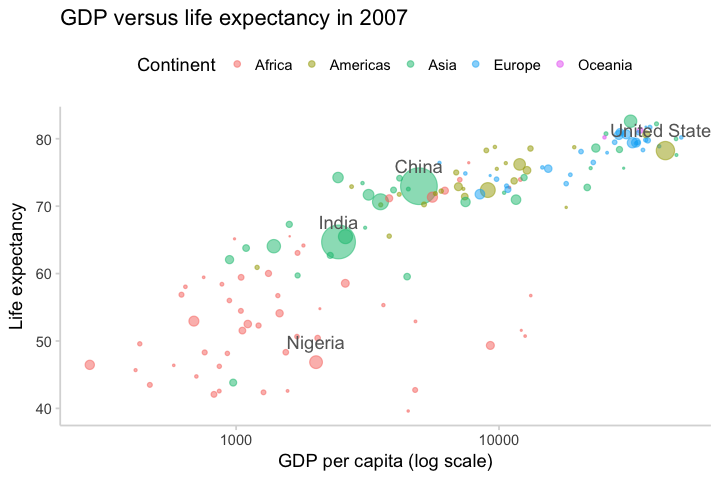

In [40]:
ggplot(gapminder_2007) +
    # add scatter points
    geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
    # log-scale the x-axis
    scale_x_log10(name = "GDP per capita (log scale)") +
    scale_y_continuous(name = "Life expectancy") + 
    scale_color_discrete(name = "Continent") +
    scale_size_continuous(name = "Population", guide = "none",
                          range = c(0.1, 10)) +
    ggtitle("GDP versus life expectancy in 2007") +
    # add a nicer theme
    theme_classic() +

    # add some text annotations for the very large countries
    geom_text(aes(x = gdpPercap, y = lifeExp + 3, label = country),
            color = "grey40",
            data = filter(gapminder_2007, pop > 1000000000 | country %in% c("Nigeria", "United States"))) +

    # place legend at top and grey axis lines
    theme(legend.position = "top",
        axis.line = element_line(color = "grey85"),
        axis.ticks = element_line(color = "grey85"))

# Saving your plots

You can save your plots using the `ggsave()` function.

In [41]:
p <- ggplot(gapminder_2007) +
    # add scatter points
    geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop), alpha = 0.5) +
    # log-scale the x-axis
    scale_x_log10(name = "GDP per capita (log scale)") +
    scale_y_continuous(name = "Life expectancy") + 
    scale_color_discrete(name = "Continent") +
    scale_size_continuous(name = "Population", guide = "none",
                          range = c(0.1, 10)) +
    ggtitle("GDP versus life expectancy in 2007") +
    # add a nicer theme
    theme_classic() +
    # add some text annotations for the very large countries
    geom_text(aes(x = gdpPercap, y = lifeExp + 3, label = country),
            color = "grey50",
            data = filter(gapminder_2007, pop > 1000000000 | country %in% c("Nigeria", "United States"))) +
    # place legend at top and grey axis lines
    theme(legend.position = "top",
        axis.line = element_line(color = "grey85"),
        axis.ticks = element_line(color = "grey85"))

# save the plot
ggsave("beautiful_plot.png", p, dpi = 300, width = 6, height = 4)

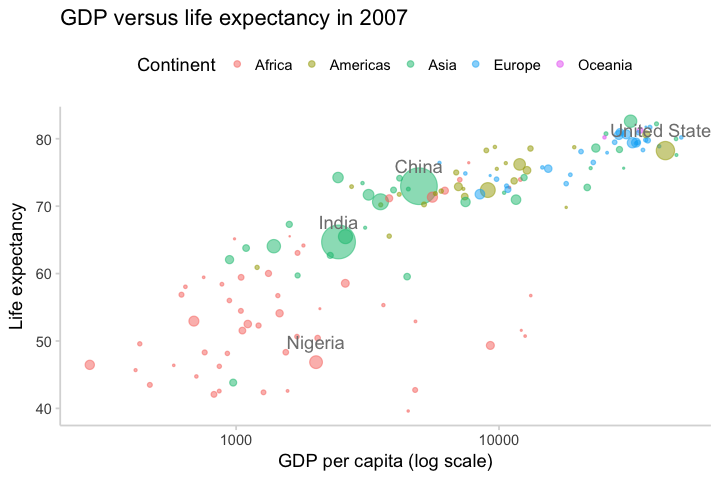

In [42]:
p